In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/AIFFEL_DATATHONE(2조)/train_df_preprocessed.csv')

In [ ]:
train_df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_1,category_2,category_3,combined_text
0,1.0,razer blackwidow chroma keyboard,3.0,Electronics/Computers & Tablets/Components & P...,razer,52.0,0.0,this keyboard is in great condition and works ...,electronics,computers tablets,components parts,razer blackwidow chroma keyboard this keyboard...
1,2.0,avaviv blouse,1.0,Women/Tops & Blouses/Blouse,target,10.0,1.0,adorable top with a hint of lace and a key hol...,women,tops blouses,blouse,avaviv blouse adorable top with a hint of lace...
2,3.0,leather horse statues,1.0,Home/Home Décor/Home Décor Accents,unknown,35.0,1.0,new with tags leather horses retail for rm eac...,home,home décor,home décor accents,leather horse statues new with tags leather ho...
3,4.0,24k gold plated rose,1.0,Women/Jewelry/Necklaces,unknown,44.0,0.0,complete with certificate of authenticity,women,jewelry,necklaces,24k gold plated rose complete with certificate...
4,5.0,bundled items requested for ruie,3.0,Women/Other/Other,banana republic,59.0,0.0,banana republic bottoms candies skirt with mat...,women,other,other,bundled items requested for ruie banana republ...
...,...,...,...,...,...,...,...,...,...,...,...,...
1392721,1482530.0,free people inspired dress,2.0,Women/Dresses/Mid-Calf,free people,20.0,1.0,lace says size small but fits medium perfectly...,women,dresses,midcalf,free people inspired dress lace says size smal...
1392722,1482531.0,little mermaid handmade dress,2.0,Kids/Girls 2T-5T/Dresses,disney,14.0,0.0,little mermaid handmade dress never worn size 2t,kids,girls 2t5t,dresses,little mermaid handmade dress little mermaid h...
1392723,1482532.0,21 day fix containers and eating plan,2.0,Sports & Outdoors/Exercise/Fitness accessories,unknown,12.0,0.0,used once or twice still in great shape,sports outdoors,exercise,fitness accessories,21 day fix containers and eating plan used onc...
1392724,1482533.0,world markets lanterns,3.0,Home/Home Décor/Home Décor Accents,unknown,45.0,1.0,there is 2 of each one that you see so 2 red 2...,home,home décor,home décor accents,world markets lanterns there is 2 of each one ...


In [ ]:
average_price = train_df['price'].mean()
print(f"전체 상품의 평균 가격: {average_price}")

전체 상품의 평균 가격: 27.043922494446143


In [ ]:
# category_1의 고유값 확인
unique_categories = train_df['category_1'].unique()
print("category_1에 존재하는 고유한 값들:")
print(unique_categories)

category_1에 존재하는 고유한 값들:
['electronics' 'women' 'home' 'sports outdoors' 'vintage collectibles'
 'beauty' 'kids' 'men' 'other' 'handmade']


In [ ]:
# category_1 별 평균 가격 계산
category1_avg_price = train_df.groupby('category_1')['price'].mean().sort_values(ascending=False)
print("category_1 별 평균 가격:")
print(category1_avg_price)

category_1 별 평균 가격:
category_1
electronics             36.181489
men                     35.109618
women                   29.231362
vintage collectibles    27.754684
sports outdoors         25.739447
home                    24.664486
other                   20.994262
kids                    20.831515
beauty                  19.720270
handmade                18.276211
Name: price, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

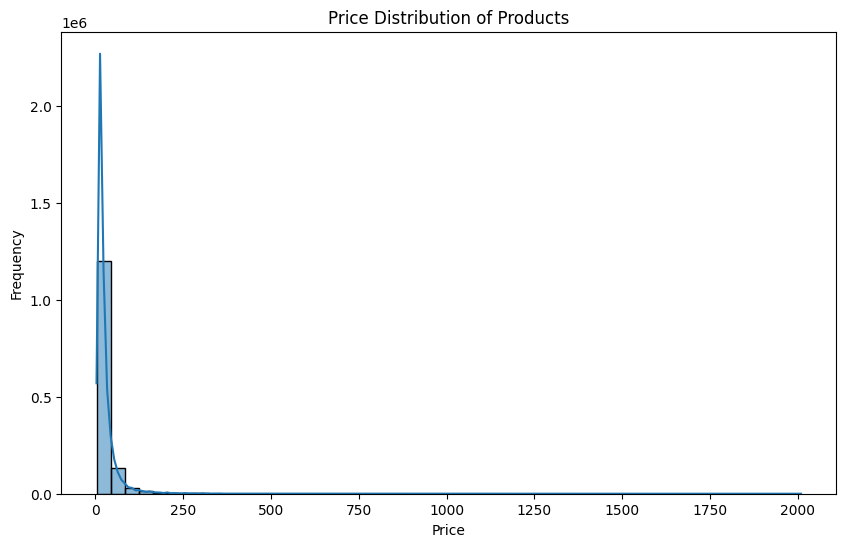

In [ ]:
# 가격 분포 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(train_df['price'], bins=50, kde=True)
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

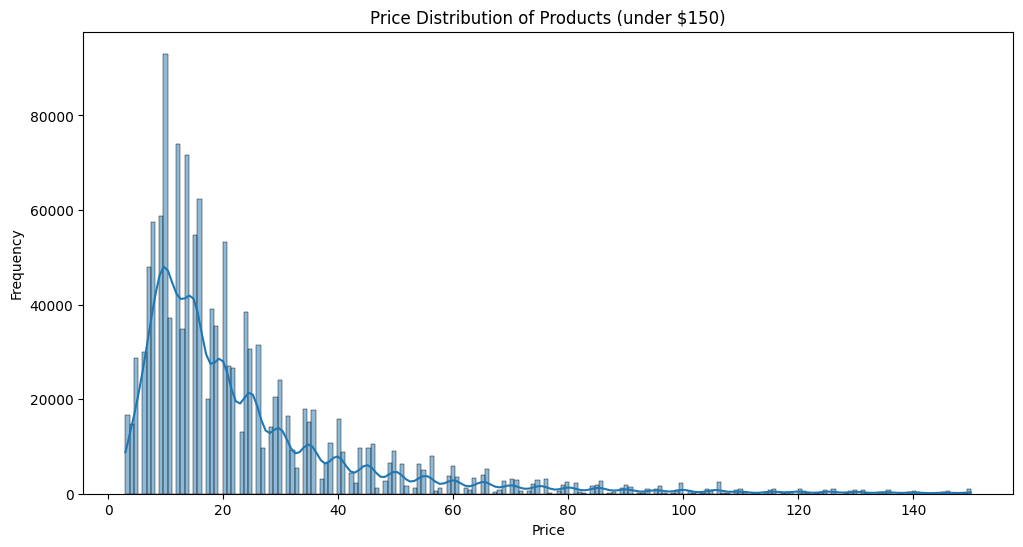

In [ ]:
# 가격 범위 제한
filtered_prices = train_df[train_df['price'] <= 150]['price']

# 히스토그램, 빈의 수를 200개로 설정
plt.figure(figsize=(12, 6))
sns.histplot(filtered_prices, bins=200, kde=True)
plt.title('Price Distribution of Products (under $150)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 전체 상품 수 계산
total_products = len(train_df)
print(f"총 등록 상품 수: {total_products}")

pd.set_option('display.max_rows', None)

# category_1별 상품 수
category1_counts = train_df.groupby('category_1').size().sort_values(ascending=False)
print("\nCategory 1 별 상품 수:")
print(category1_counts)

# category_2별 상품 수
category2_counts = train_df.groupby('category_2').size().sort_values(ascending=False).head(10)
print("\nCategory 2 별 상품 수:")
print(category2_counts)

# category_3별 상품 수
category3_counts = train_df.groupby('category_3').size().sort_values(ascending=False).head(10)
print("\nCategory 3 별 상품 수:")
print(category3_counts)


총 등록 상품 수: 1392726

Category 1 별 상품 수:
category_1
women                   626292
beauty                  199807
kids                    160854
electronics             115087
men                      87819
home                     62215
vintage collectibles     44088
other                    42699
handmade                 29749
sports outdoors          24116
dtype: int64

Category 2 별 상품 수:
category_2
athletic apparel           127332
makeup                     120001
tops blouses                98521
shoes                       95359
jewelry                     58479
toys                        53510
cell phones accessories     50541
womens handbags             43364
dresses                     42872
womens accessories          39927
dtype: int64

Category 3 별 상품 수:
category_3
pants tights leggings    57384
tshirts                  56151
face                     48555
other                    46951
shoes                    30292
lips                     29609
games                    2

<ipython-input-29-b2236dad2691>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category_1', y='price', data=train_df, palette='Set3')


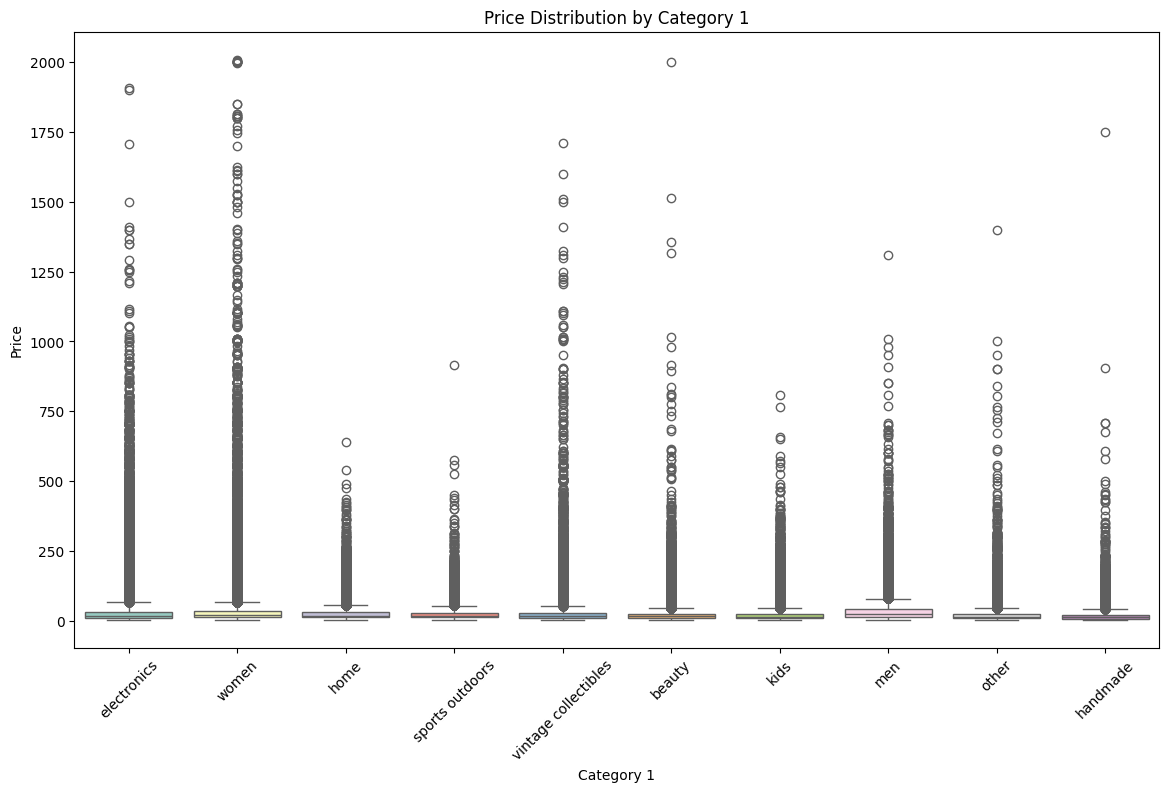

In [ ]:
# 가격 분포 시각화를 위한 boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='category_1', y='price', data=train_df, palette='Set3')
plt.title('Price Distribution by Category 1')
plt.xlabel('Category 1')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-885cb153cf84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category_2', y='price', data=train_df, palette='Set2')  # 'Set2'는 다양한 색상을 제공


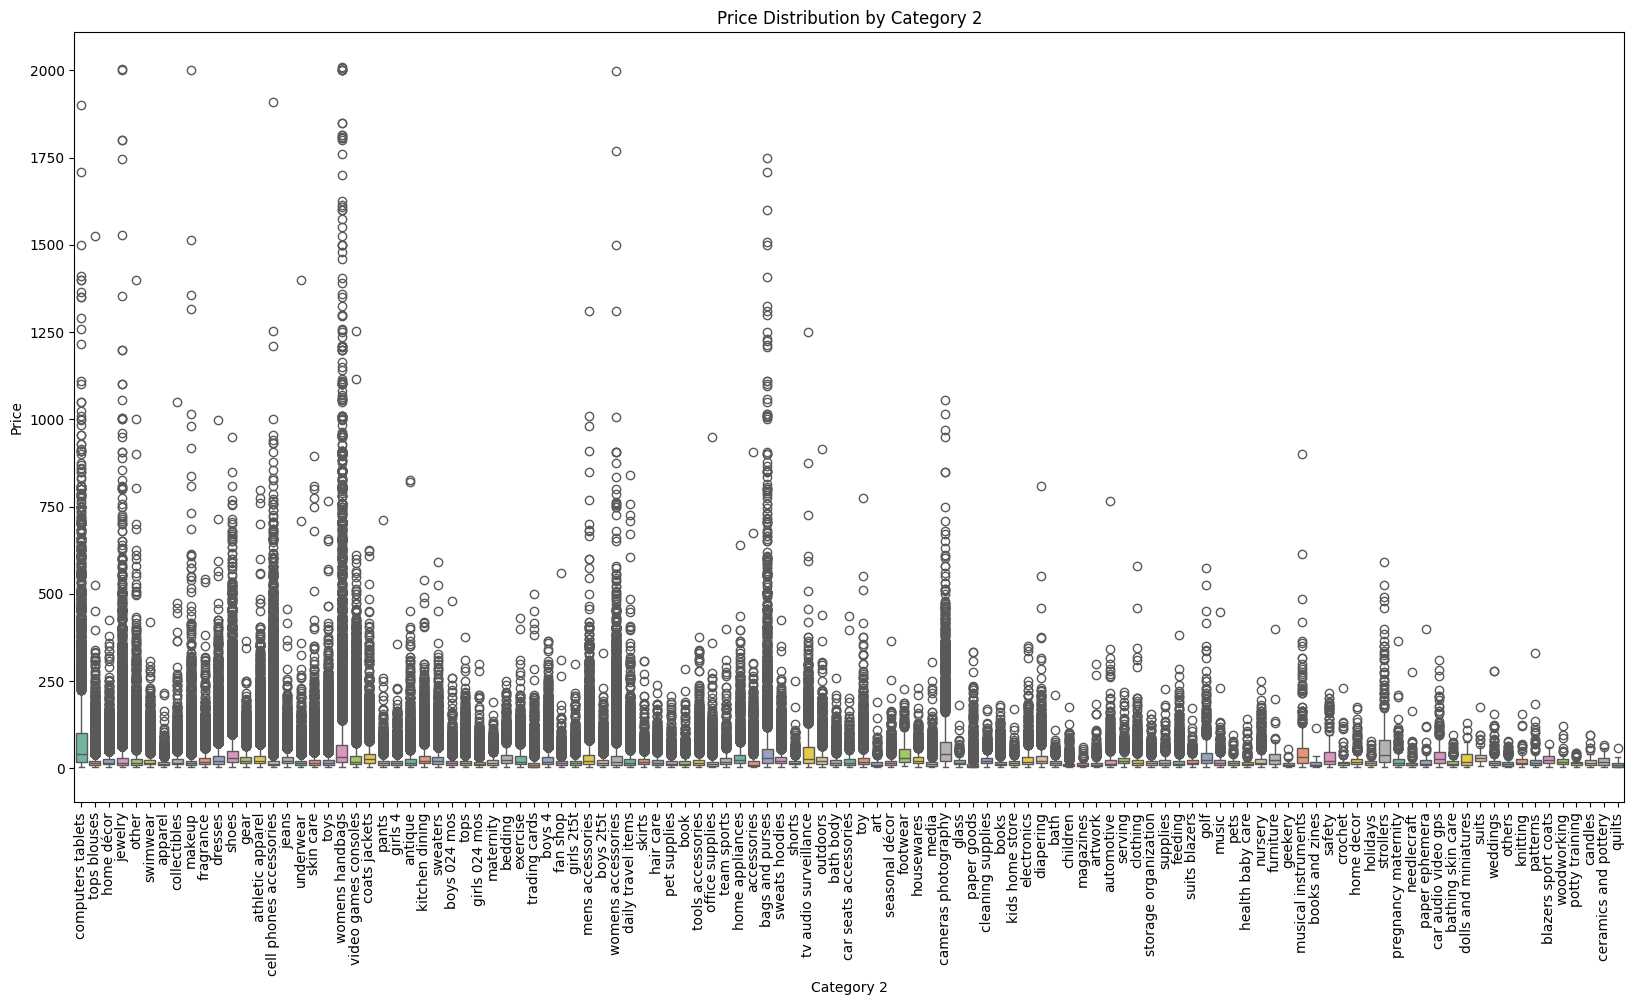

In [ ]:
# Category 2의 가격 분포 시각화를 위한 boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='category_2', y='price', data=train_df, palette='Set2')
plt.title('Price Distribution by Category 2')
plt.xlabel('Category 2')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

<ipython-input-33-1598dde6a110>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category_3', y='price', data=train_df, palette='Set1')  # 'Set1'은 밝은 색상을 제공


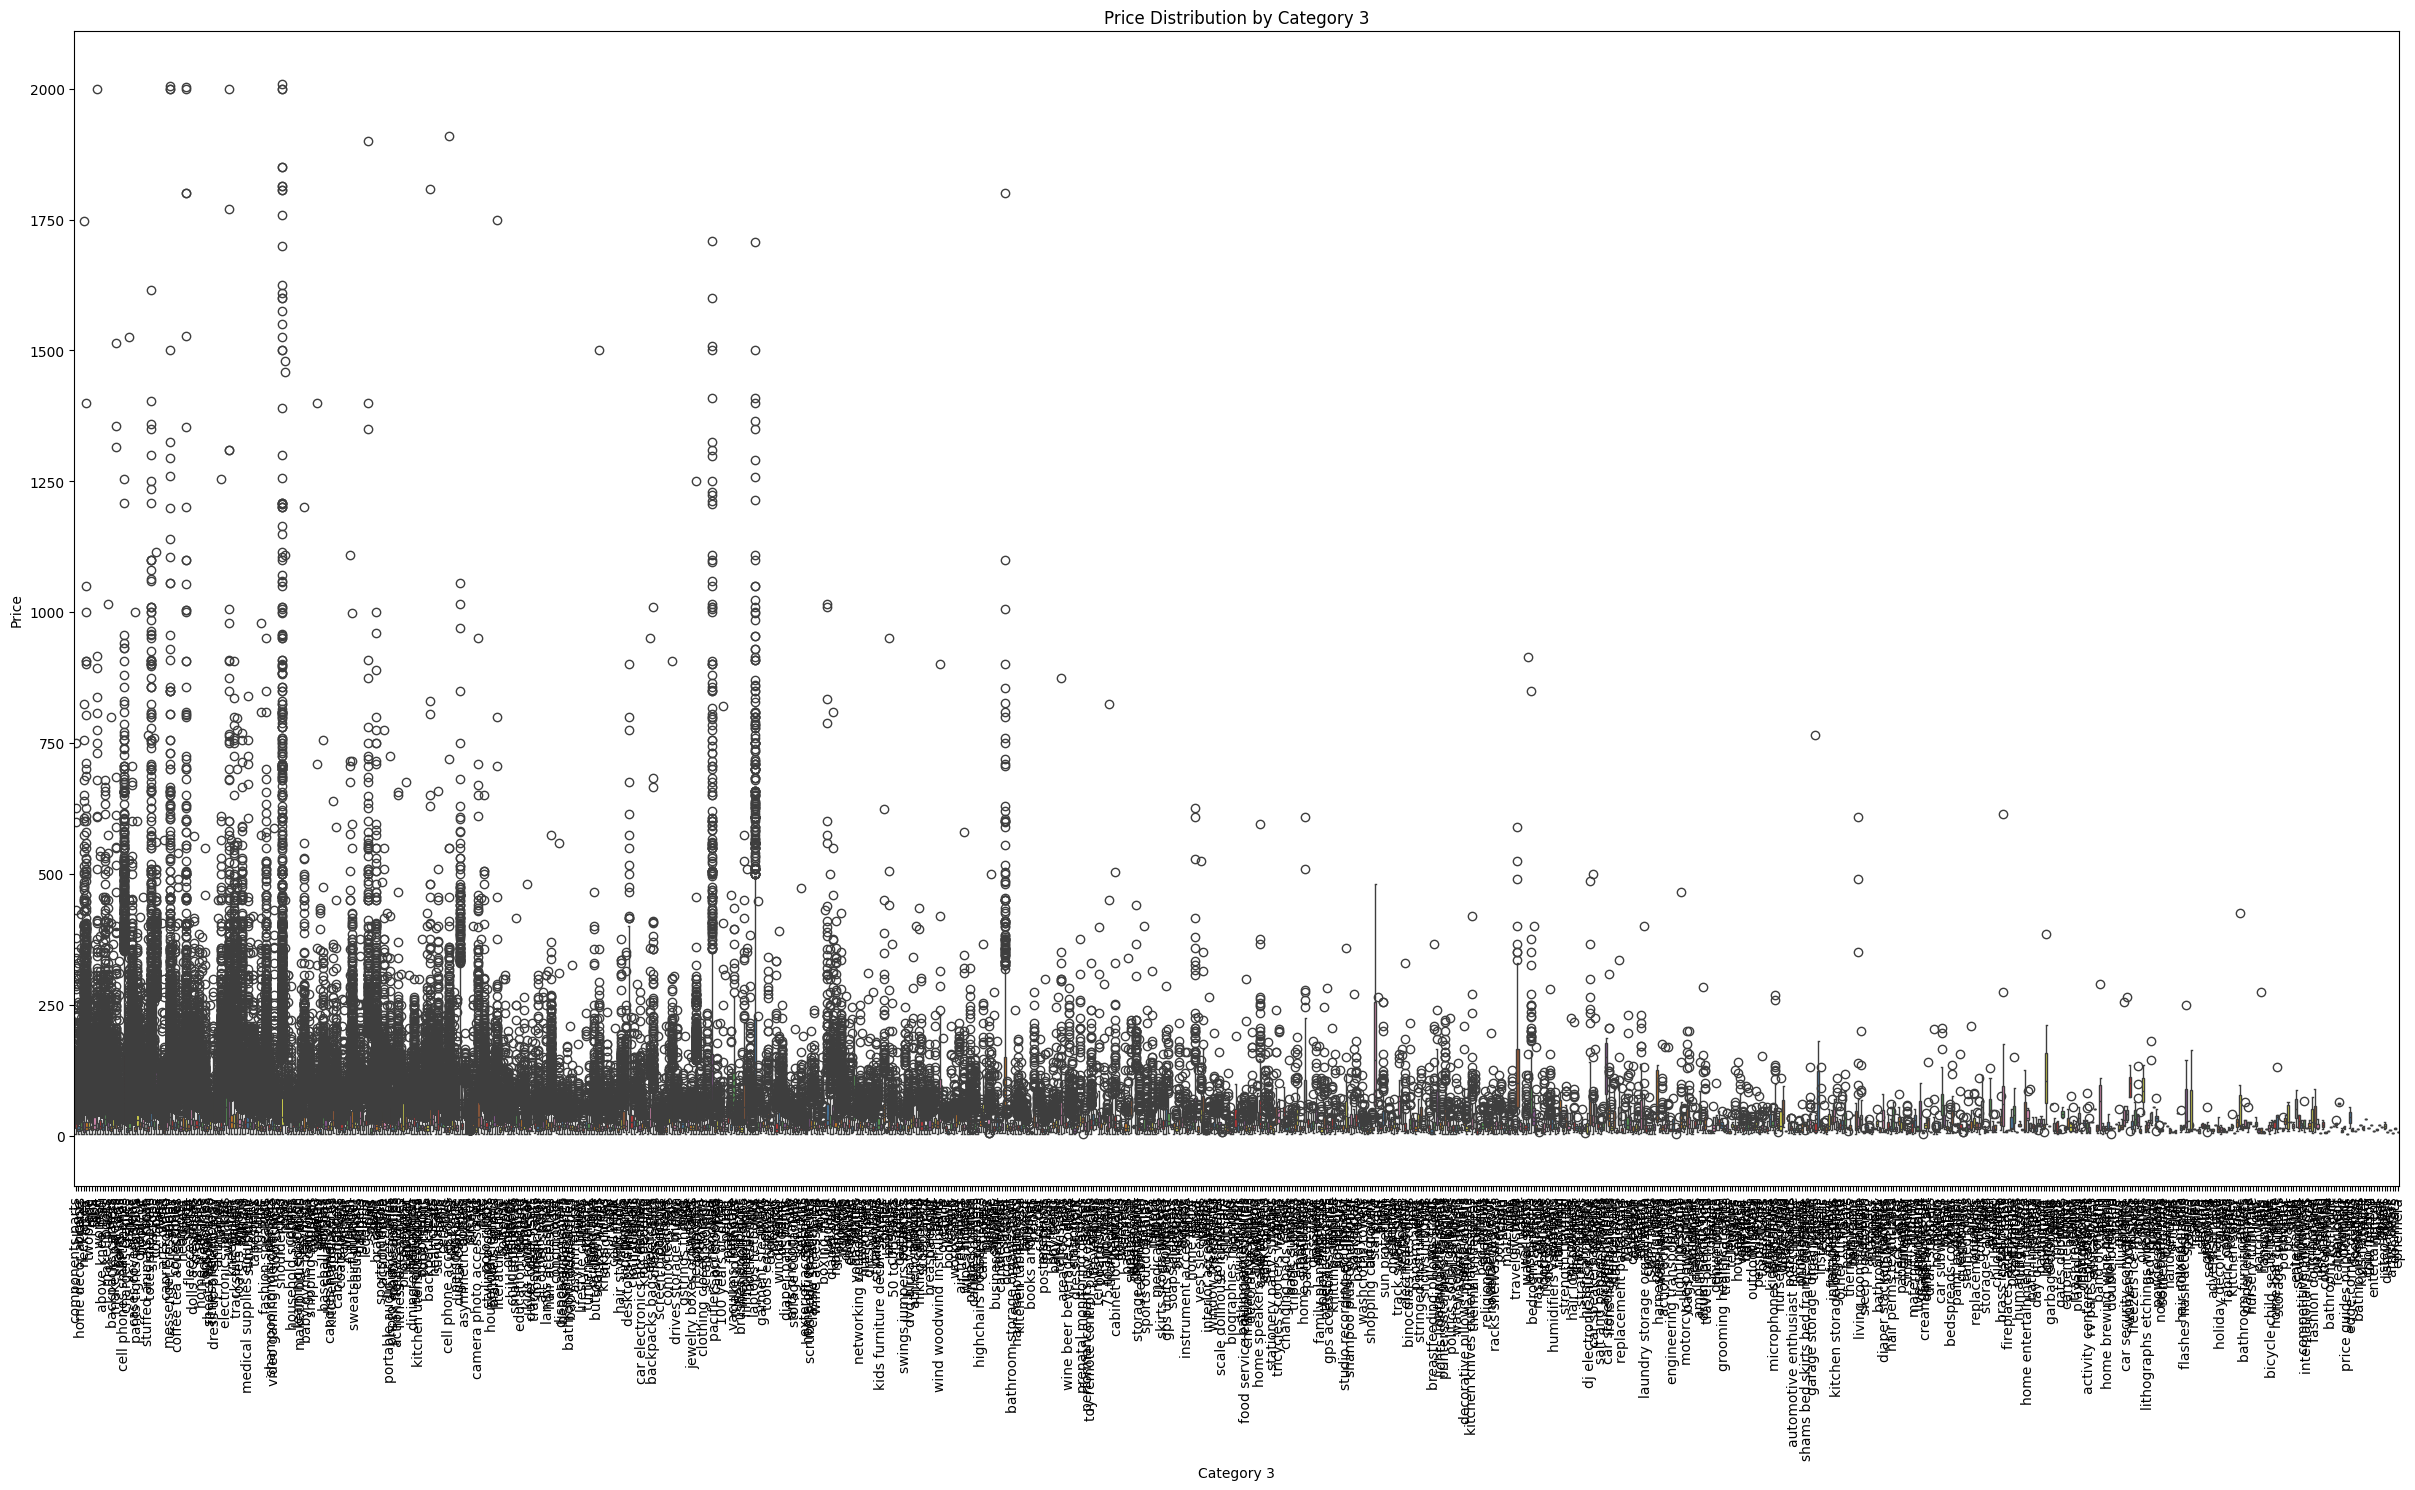

In [ ]:
plt.figure(figsize=(30, 15))
sns.boxplot(x='category_3', y='price', data=train_df, palette='Set1')
plt.title('Price Distribution by Category 3')
plt.xlabel('Category 3')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

<ipython-input-34-8b85f197098f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='category', y='price', kind='box', data=train_df, height=5, aspect=3, palette='Set3')


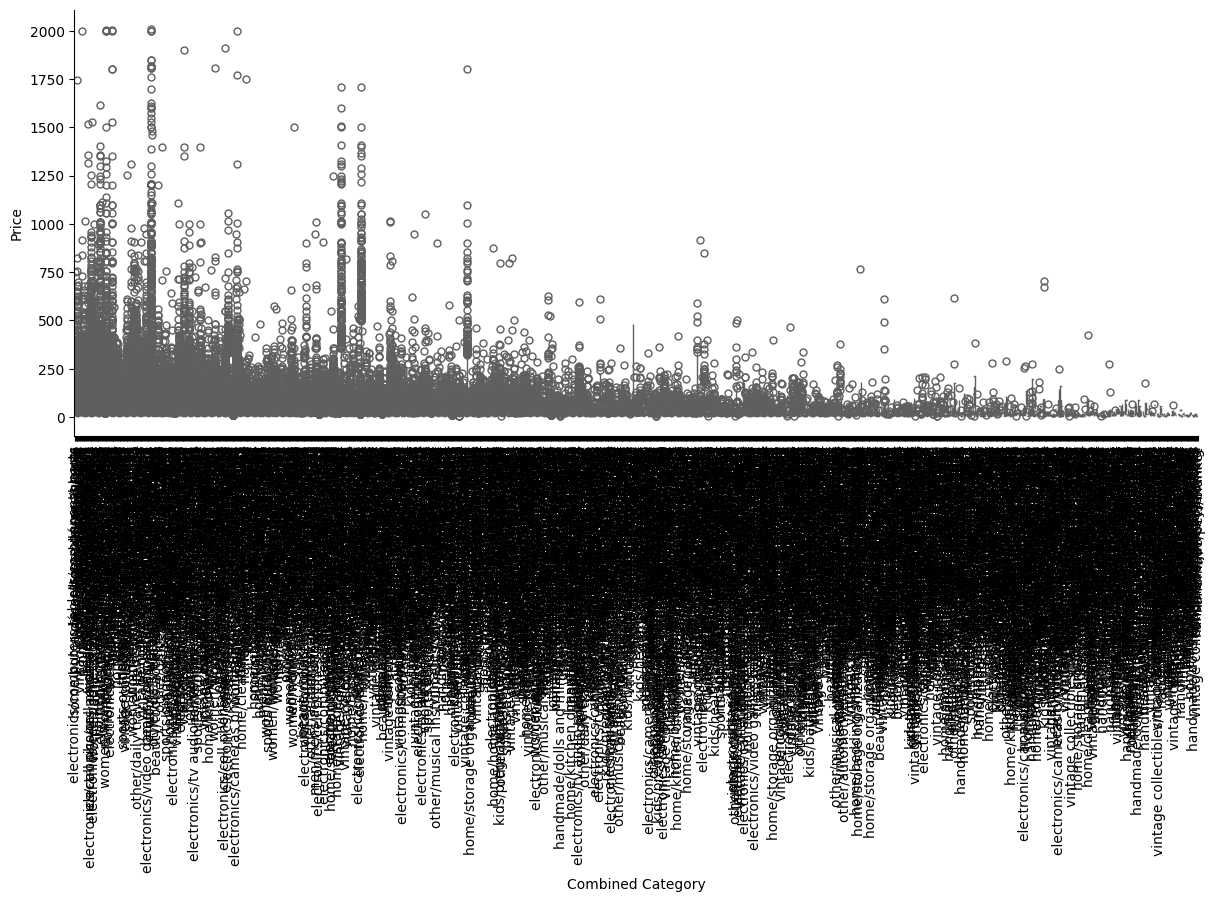

In [ ]:
# 새로운 'category' 열을 생성하여 category_1, category_2, category_3 값을 결합
train_df['category'] = train_df['category_1'] + '/' + train_df['category_2'] + '/' + train_df['category_3']

# catplot을 사용하여 각 카테고리별 가격 분포 시각화
g = sns.catplot(x='category', y='price', kind='box', data=train_df, height=5, aspect=3, palette='Set3')
g.set_xticklabels(rotation=90)
g.set_titles('Price Distribution by Combined Categories')
g.set_axis_labels('Combined Category', 'Price')
plt.show()

<ipython-input-4-476116ccb92f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="price", col="category_1", kind="box", data=train_df, col_wrap=4, height=3, aspect=1.2, palette='Set2')
<ipython-input-4-476116ccb92f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  h = sns.catplot(x="price", col="category_2", kind="box", data=train_df, col_wrap=4, height=3, aspect=1.2, palette='Set2')


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x79c61758feb0> (for post_execute):


KeyboardInterrupt: 

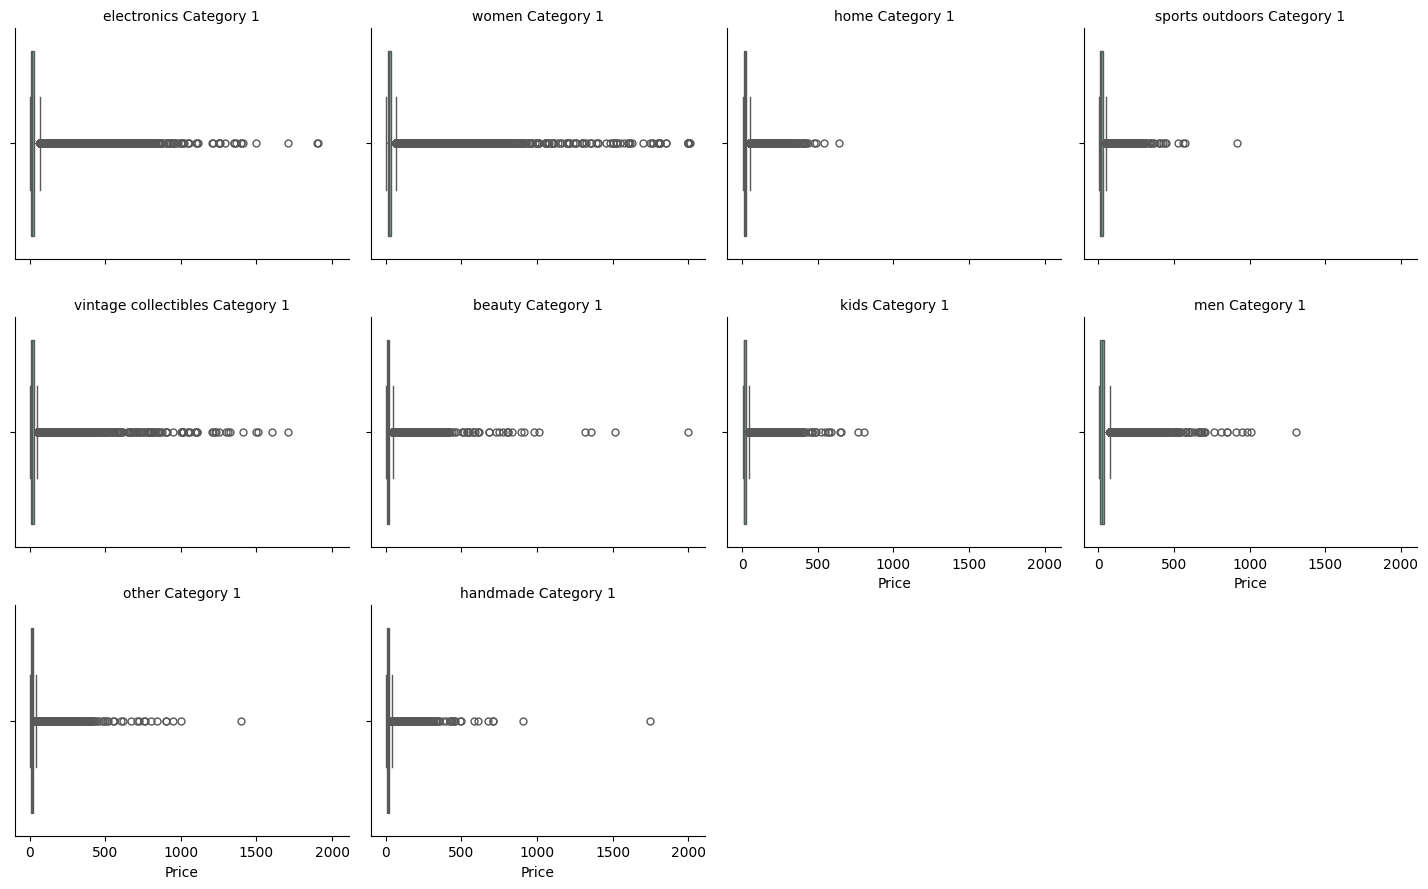

Error in callback <function flush_figures at 0x79c61758f130> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# catplot으로 각 카테고리 별로 서브플롯 생성
g = sns.catplot(x="price", col="category_1", kind="box", data=train_df, col_wrap=4, height=3, aspect=1.2, palette='Set2')
g.set_titles("{col_name} Category 1")
g.set_axis_labels("Price", "")

# category_2
h = sns.catplot(x="price", col="category_2", kind="box", data=train_df, col_wrap=4, height=3, aspect=1.2, palette='Set2')
h.set_titles("{col_name} Category 2")
h.set_axis_labels("Price", "")

# category_3
i = sns.catplot(x="price", col="category_3", kind="box", data=train_df, col_wrap=4, height=3, aspect=1.2, palette='Set2')
i.set_titles("{col_name} Category 3")
i.set_axis_labels("Price", "")

plt.show()

Item Condition ID 별 상품 수:
item_condition_id
1.0    608225
3.0    405007
2.0    347343
4.0     29905
5.0      2246
Name: count, dtype: int64


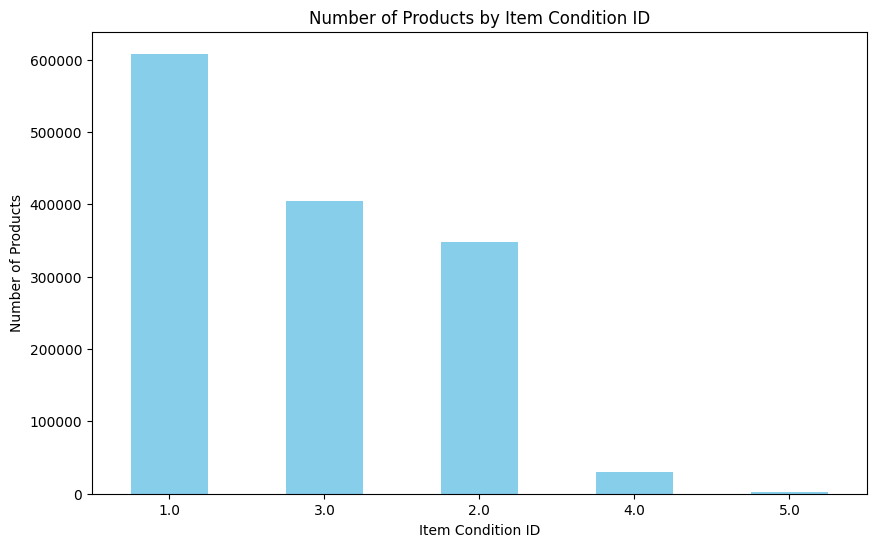

In [ ]:
# item_condition_id 별 상품 수 계산
item_condition_counts = train_df['item_condition_id'].value_counts()

# 상품 수 출력
print("Item Condition ID 별 상품 수:")
print(item_condition_counts)

# 결과 시각화
plt.figure(figsize=(10, 6))
item_condition_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Products by Item Condition ID')
plt.xlabel('Item Condition ID')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# 브랜드 이름 소문자 변환
train_df['brand_name'] = train_df['brand_name'].str.lower()

# 특정 브랜드를 포함하는지 여부 확인
contains_nike = train_df['brand_name'].str.contains('nike')
contains_lululemon = train_df['brand_name'].str.contains('lululemon')
contains_michael_kors = train_df['brand_name'].str.contains('michael kors')

# 각 브랜드의 상품 수 계산
nike_count = contains_nike.sum()
lululemon_count = contains_lululemon.sum()
michael_kors_count = contains_michael_kors.sum()

# 결과 출력
print("브랜드 포함 상품 수:")
print(f"Nike: {nike_count}")
print(f"Lululemon: {lululemon_count}")
print(f"Michael Kors: {michael_kors_count}")

브랜드 포함 상품 수:
Nike: 53102
Lululemon: 15695
Michael Kors: 14048


In [ ]:
# 브랜드 이름 소문자 변환
train_df['brand_name'] = train_df['brand_name'].str.lower()

# 지정된 브랜드 목록
brands = ['nike', 'lululemon', 'american eagle', 'pacsun', 'shein',
          'converse', 'adidas', 'new balance', 'vans', 'coach',
          'louis vuitton', 'kate spade', 'michael kors', 'chanel']

# 각 브랜드별 상품 수 계산
brand_counts = {brand: train_df['brand_name'].str.contains(brand).sum() for brand in brands}

# 데이터프레임으로 변환
brand_df = pd.DataFrame(list(brand_counts.items()), columns=['Brand', 'Count'])

# 전체 상품 수
total_products = len(train_df)

# 각 브랜드별 비율 계산
brand_df['Percentage'] = (brand_df['Count'] / total_products) * 100

# 높은 순으로 정렬
brand_df.sort_values(by='Count', ascending=False, inplace=True)

# 결과 출력
print(brand_df)

             Brand  Count  Percentage
0             nike  53102    3.812810
1        lululemon  15695    1.126927
12    michael kors  14048    1.008669
2   american eagle  13054    0.937299
6           adidas  12086    0.867795
9            coach  10516    0.755066
5         converse   6219    0.446534
11      kate spade   5704    0.409557
8             vans   5216    0.374517
10   louis vuitton   3399    0.244054
13          chanel   2723    0.195516
7      new balance    824    0.059165
3           pacsun      0    0.000000
4            shein      0    0.000000


In [ ]:
# 고유한 브랜드 수 계산
unique_brand_count = train_df['brand_name'].nunique()

# 결과 출력
print(f"전체 등록된 브랜드의 개수: {unique_brand_count}")

전체 등록된 브랜드의 개수: 4711


In [ ]:
# 브랜드 별 상품 수 계산
product_counts_by_brand = train_df['brand_name'].value_counts().head(50)

# 결과 출력
print("브랜드 별 등록된 상품 수:")
print(product_counts_by_brand)

브랜드 별 등록된 상품 수:
brand_name
unknown                    398774
victorias secret            84547
lularoe                     60129
nike                        52998
pink                        38837
apple                       19721
nintendo                    15075
lululemon                   14721
forever 21                  14472
michael kors                14048
rae dunn                    13068
american eagle              13054
sephora                     12610
disney                      12515
adidas                      11282
coach                       10516
funko                       10063
bath body works              9896
under armour                 9501
old navy                     7915
sony                         7511
vintage                      7085
so                           6918
hollister                    6786
urban decay                  6738
carters                      6577
xbox                         6351
too faced                    6295
the north face       

In [ ]:
# 브랜드 별로 그룹화하고 각 그룹의 상품 수와 평균 가격 계산
brand_stats = train_df.groupby('brand_name').agg(
    Count=('price', 'size'),
    Average_Price=('price', 'mean')
)

# 평균 가격이 높은 순으로 정렬
brand_stats_sorted = brand_stats.sort_values(by='Average_Price', ascending=False)

# 결과 출력
print(brand_stats_sorted)

                           Count  Average_Price
brand_name                                     
proenza schouler               4     413.250000
oris                           1     300.000000
mcm worldwide                 60     264.250000
longines                       1     254.000000
canada goose                  17     253.235294
...                          ...            ...
revlon colorsilk               1       3.000000
genica                         1       3.000000
pedialyte                      1       3.000000
kids only                      1       3.000000
twilight gypsy collective      1       3.000000

[4711 rows x 2 columns]


In [ ]:
# 브랜드 별로 그룹화하고 각 그룹의 상품 수와 평균 가격 계산
brand_stats = train_df.groupby('brand_name').agg(
    Count=('price', 'size'),
    Average_Price=('price', 'mean')
)

# 상품 수가 많은 순으로 정렬
brand_stats_sorted_by_count = brand_stats.sort_values(by='Count', ascending=False).head(50)

# 결과 출력
print(brand_stats_sorted_by_count)

                          Count  Average_Price
brand_name                                    
unknown                  398774      19.105078
victorias secret          84547      25.052527
lularoe                   60129      36.679830
nike                      52998      30.889788
pink                      38837      21.049116
apple                     19721      67.627352
nintendo                  15075      35.246833
lululemon                 14721      47.027783
forever 21                14472      13.101023
michael kors              14048      61.530752
rae dunn                  13068      36.670187
american eagle            13054      16.163973
sephora                   12610      21.662530
disney                    12515      17.292050
adidas                    11282      41.014005
coach                     10516      41.115300
funko                     10063      29.956971
bath body works            9896      17.913601
under armour               9501      19.375645
old navy     

In [ ]:
# category_1, brand_name 별로 그룹화하여 상품 수 계산
category_brand_counts = train_df.groupby(['category_1', 'brand_name']).size().reset_index(name='Count')

# 각 category_1 내에서 상품 수가 많은 순으로 정렬하고, 각 카테고리별 상위 5개 브랜드 추출
top_brands_by_category = category_brand_counts.groupby('category_1').apply(
    lambda x: x.sort_values('Count', ascending=False).head(10)
).reset_index(drop=True)

# 결과 출력
print(top_brands_by_category)

   category_1        brand_name  Count
0      beauty           unknown  64030
1      beauty           sephora  12608
2      beauty  victorias secret   8756
3      beauty   bath body works   8694
4      beauty       urban decay   6737
..        ...               ...    ...
95      women         lululemon  14390
96      women        forever 21  14033
97      women      michael kors  12979
98      women    american eagle  11678
99      women             coach   9655

[100 rows x 3 columns]


In [ ]:
# category_1, brand_name 별로 그룹화하여 상품 수 계산
category_brand_counts = train_df.groupby(['category_1', 'brand_name']).size().reset_index(name='Count')

# 각 category_1 내에서 상품 수가 많은 순으로 정렬하고, 각 카테고리별 상위 10개 브랜드 추출
top_brands_by_category = category_brand_counts.groupby('category_1').apply(
    lambda x: x.sort_values('Count', ascending=False).head(10)
).reset_index(drop=True)

# Pandas 출력 옵션 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

# 결과 출력
print(top_brands_by_category)

              category_1               brand_name   Count
0                 beauty                  unknown   64030
1                 beauty                  sephora   12608
2                 beauty         victorias secret    8756
3                 beauty          bath body works    8694
4                 beauty              urban decay    6737
5                 beauty                too faced    6295
6                 beauty                      mac    5528
7                 beauty                    tarte    5225
8                 beauty                senegence    3710
9                 beauty                     pink    3599
10           electronics                  unknown   41663
11           electronics                    apple   19245
12           electronics                 nintendo   13672
13           electronics                     sony    7078
14           electronics                     xbox    5999
15           electronics                  samsung    5373
16           e

In [ ]:
# 확장된 가격 구간 설정
bins = [0, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000, float('inf')]
labels = ['0-10', '11-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10000+']

# 가격 구간으로 데이터 분류
train_df['price_range'] = pd.cut(train_df['price'], bins=bins, labels=labels, right=False)

# 각 가격 구간별 상품 수 계산
price_distribution = train_df['price_range'].value_counts().sort_index()

# 결과 출력
print(price_distribution)

price_range
0-10          254635
11-20         522144
21-50         463123
51-100        110008
101-200        32299
201-500         9388
501-1000         959
1001-5000        170
5001-10000         0
10000+             0
Name: count, dtype: int64


<ipython-input-55-b04b7993e480>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_distribution.index, y=price_distribution.values, palette='viridis')


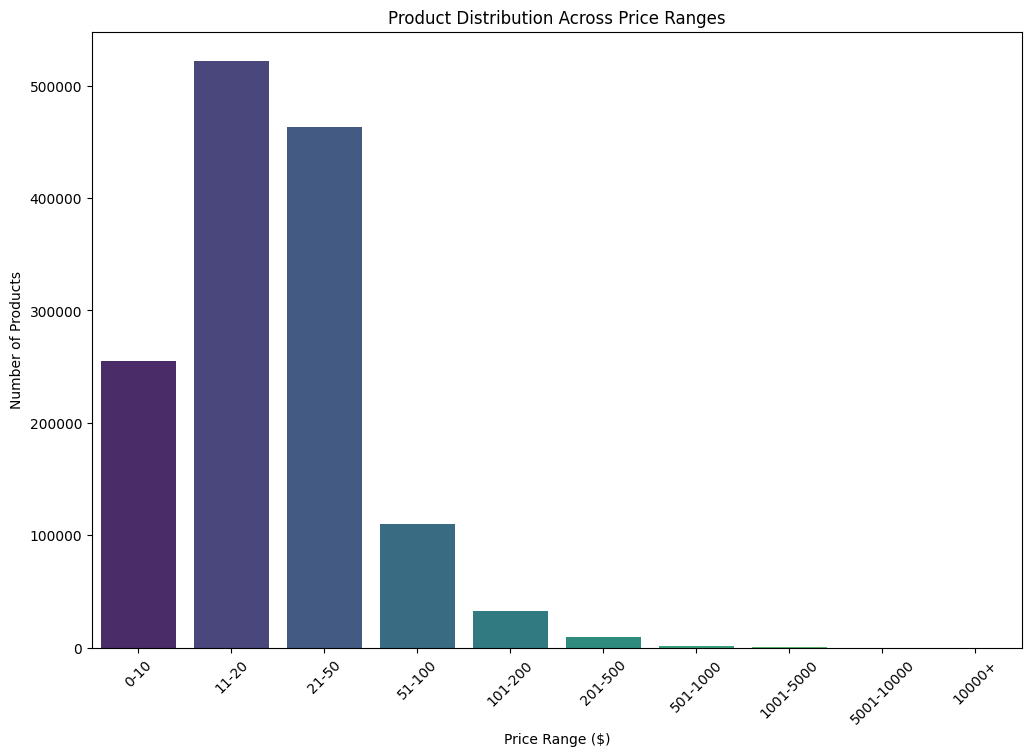

In [ ]:
# 가격 구간 설정
bins = [0, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000, float('inf')]
labels = ['0-10', '11-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10000+']

# 가격 구간으로 데이터 분류
train_df['price_range'] = pd.cut(train_df['price'], bins=bins, labels=labels, right=False)

# 각 가격 구간별 상품 수 계산
price_distribution = train_df['price_range'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=price_distribution.index, y=price_distribution.values, palette='viridis')
plt.title('Product Distribution Across Price Ranges')
plt.xlabel('Price Range ($)')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 가격 구간 설정
bins = [0, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000, float('inf')]
labels = ['0-10', '11-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10000+']

# 가격 구간으로 데이터 분류
train_df['price_range'] = pd.cut(train_df['price'], bins=bins, labels=labels, right=False)

# 각 가격 구간별 상품 수 계산
price_distribution = train_df['price_range'].value_counts().sort_index()

# 전체 상품 수 계산
total_products = train_df.shape[0]

# 백분율 계산
percentage_distribution = (price_distribution / total_products) * 100
percentage_distribution

price_range
0-10          18.283209
11-20         37.490791
21-50         33.252987
51-100         7.898754
101-200        2.319121
201-500        0.674074
501-1000       0.068858
1001-5000      0.012206
5001-10000     0.000000
10000+         0.000000
Name: count, dtype: float64

In [ ]:
# 가격 구간 설정
bins = [0, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000, float('inf')]
labels = ['0-10', '11-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10000+']

# 가격 구간으로 데이터 분류
train_df['price_range'] = pd.cut(train_df['price'], bins=bins, labels=labels, right=False)

# 각 가격 구간별 주요 상품 추출
def get_top_products(sub_df, num_top=5):
    return sub_df['name'].value_counts().nlargest(num_top)

top_products_by_range = train_df.groupby('price_range').apply(get_top_products)

# 결과 출력
print(top_products_by_range)

price_range  name                               
0-10         choker                                  178
             crop top                                171
             fidget spinner                          169
             slime                                   137
             reserved                                121
11-20        bundle                                  972
             american eagle jeans                    413
             lularoe tc leggings                     379
             lularoe os leggings                     363
             hollister jeans                         273
21-50        bundle                                 1424
             lularoe tc leggings                     683
             miss me jeans                           532
             lularoe os leggings                     486
             coach purse                             438
51-100       bundle                                  325
             michael kors purse        

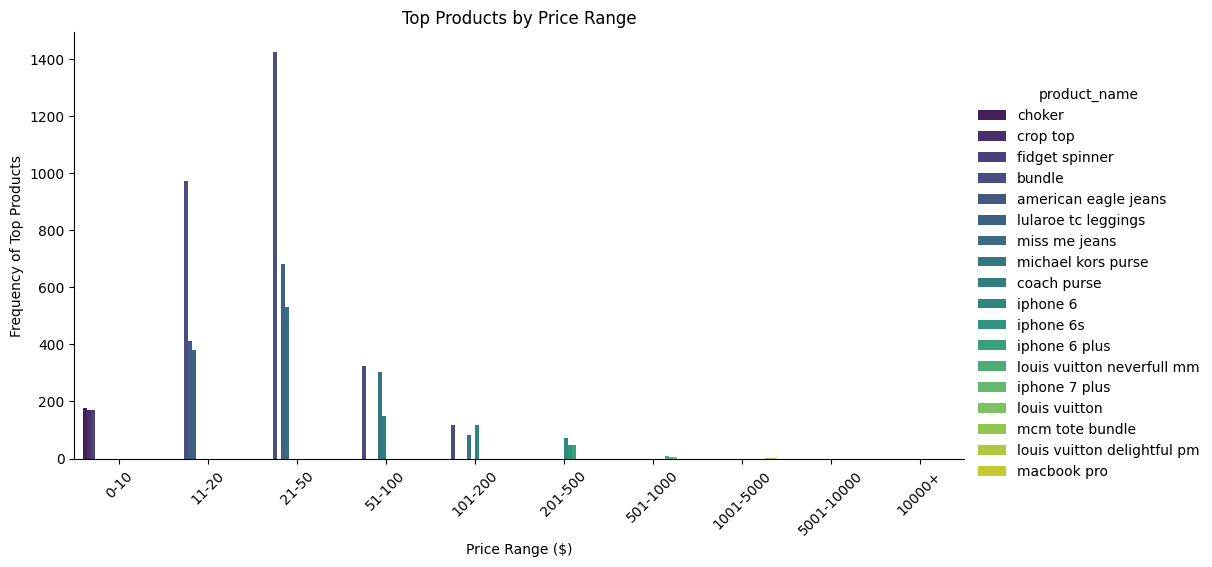

In [ ]:
# 가격 구간 설정
bins = [0, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000, float('inf')]
labels = ['0-10', '11-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10000+']

# 가격 구간으로 데이터 분류
train_df['price_range'] = pd.cut(train_df['price'], bins=bins, labels=labels, right=False)

# 각 가격 구간별 주요 상품 추출
def get_top_products(sub_df, num_top=3):
    return sub_df['name'].value_counts().nlargest(num_top).reset_index()

# 각 구간별 주요 상품을 포함하는 새로운 데이터프레임 생성
top_products_by_range = train_df.groupby('price_range').apply(lambda x: get_top_products(x)).reset_index()
top_products_by_range.columns = ['price_range', 'level_1', 'product_name', 'count']

# 시각화
g = sns.catplot(x='price_range', y='count', hue='product_name', data=top_products_by_range, kind='bar', palette='viridis', height=5, aspect=2)
g.set_xticklabels(rotation=45)
g.set_axis_labels("Price Range ($)", "Frequency of Top Products")
g.set_titles("Top Products in Each Price Range")
plt.title('Top Products by Price Range')
plt.show()

주요 가격 구간: 11-20
해당 가격 구간의 주요 상품들:
name
bundle                   972
american eagle jeans     413
lularoe tc leggings      379
lularoe os leggings      363
hollister jeans          273
nike shorts              270
reserved                 267
american eagle shorts    260
romper                   219
victorias secret bra     218
Name: count, dtype: int64


<ipython-input-10-e07c674370d1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_distribution.index, y=price_distribution.values, palette='viridis')


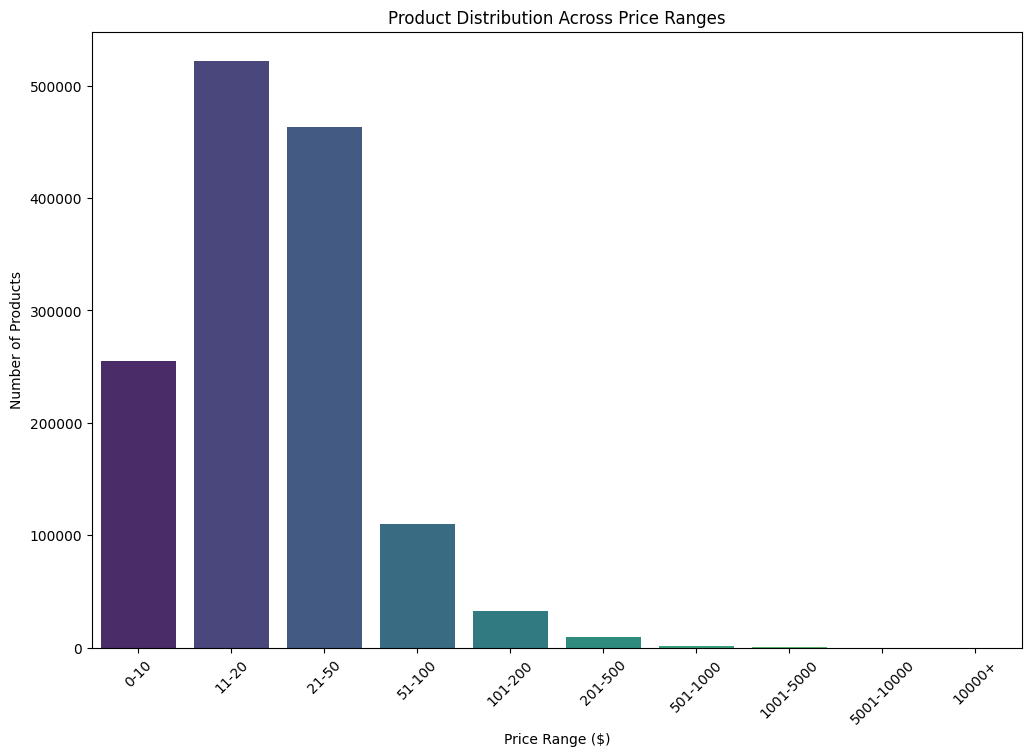

In [ ]:
# 가격 구간 설정
bins = [0, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000, float('inf')]
labels = ['0-10', '11-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10000+']

# 가격 구간으로 데이터 분류
train_df['price_range'] = pd.cut(train_df['price'], bins=bins, labels=labels, right=False)

# 각 가격 구간별 상품 수 계산
price_distribution = train_df['price_range'].value_counts().sort_index()

# 주요 가격 구간 식별
major_price_range = price_distribution.idxmax()

# 해당 가격 구간의 상품 이름 분석
top_products_in_major_range = train_df[train_df['price_range'] == major_price_range]['name'].value_counts().head(10)

# 결과 출력
print(f"주요 가격 구간: {major_price_range}")
print("해당 가격 구간의 주요 상품들:")
print(top_products_in_major_range)

# 전체 가격 구간 분포 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=price_distribution.index, y=price_distribution.values, palette='viridis')
plt.title('Product Distribution Across Price Ranges')
plt.xlabel('Price Range ($)')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

<ipython-input-11-6f9a8d10467b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, palette='viridis')


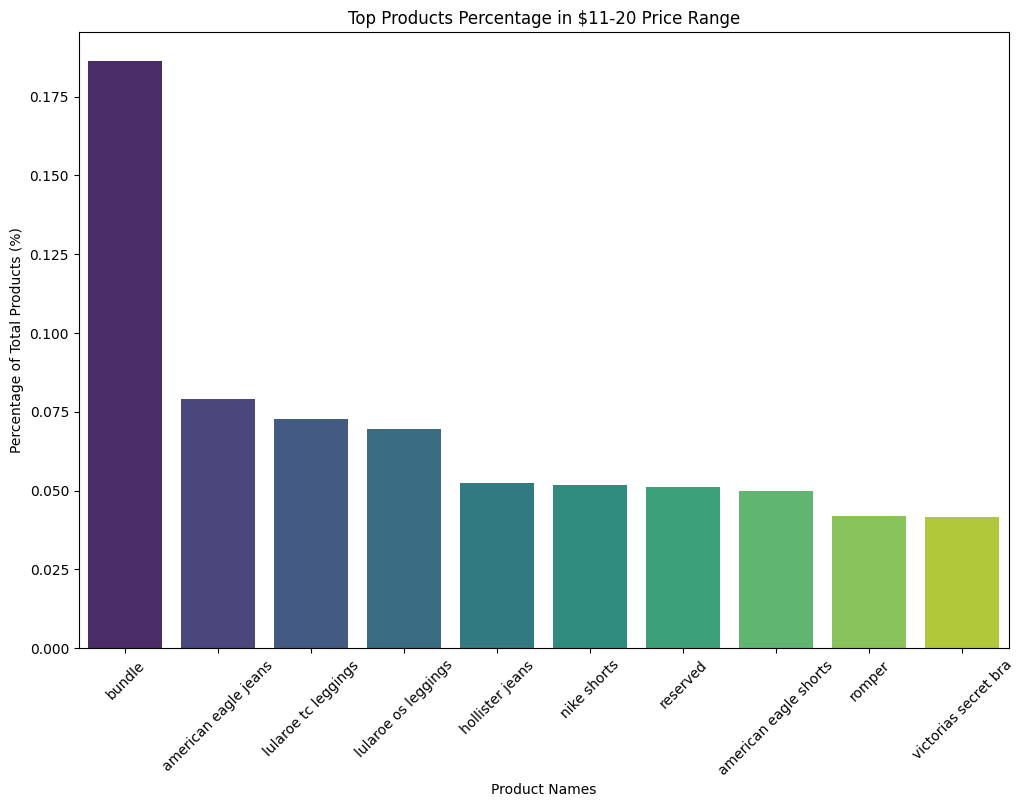

In [ ]:
bins = [0, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000, float('inf')]
labels = ['0-10', '11-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10000+']
train_df['price_range'] = pd.cut(train_df['price'], bins=bins, labels=labels, right=False)

# 주요 가격 구간에서의 상품 이름 분석
major_price_range = '11-20'
top_products_in_range = train_df[train_df['price_range'] == major_price_range]['name'].value_counts().head(10)

# 전체 상품 수에서 해당 상품들의 백분율 계산
total_products_in_range = train_df[train_df['price_range'] == major_price_range].shape[0]
percentages = (top_products_in_range / total_products_in_range) * 100

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=percentages.index, y=percentages.values, palette='viridis')
plt.title('Top Products Percentage in $11-20 Price Range')
plt.xlabel('Product Names')
plt.ylabel('Percentage of Total Products (%)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 가격 구간 설정 및 데이터 분류
bins = [0, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000, float('inf')]
labels = ['0-10', '11-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10000+']
train_df['price_range'] = pd.cut(train_df['price'], bins=bins, labels=labels, right=False)

# '11-20' 가격 구간에서 상품 이름별로 개수 계산
price_range = '11-20'
products_count = train_df[train_df['price_range'] == price_range]['name'].value_counts()

# 상품 이름별 백분율 계산
total_count = products_count.sum()
percentage = (products_count / total_count) * 100

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'Product Name': products_count.index,
    'Count': products_count.values,
    'Percentage': percentage.values
})

# 데이터프레임 출력
print(result_df.head(10))

            Product Name  Count  Percentage
0                 bundle    972    0.186156
1   american eagle jeans    413    0.079097
2    lularoe tc leggings    379    0.072585
3    lularoe os leggings    363    0.069521
4        hollister jeans    273    0.052284
5            nike shorts    270    0.051710
6               reserved    267    0.051135
7  american eagle shorts    260    0.049795
8                 romper    219    0.041942
9   victorias secret bra    218    0.041751


In [ ]:
# 카테고리별 빈도 계산
category_frequencies = train_df['category_name'].value_counts()

# 상위 30개 카테고리 출력
top_30_categories = category_frequencies.head(30)
top_30_categories

category_name
Women/Athletic Apparel/Pants, Tights, Leggings                 57384
Women/Tops & Blouses/T-Shirts                                  42319
Beauty/Makeup/Face                                             33245
Beauty/Makeup/Lips                                             28676
Beauty/Makeup/Eyes                                             24378
Electronics/Video Games & Consoles/Games                       24094
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    23259
Women/Underwear/Bras                                           20447
Women/Dresses/Above Knee, Mini                                 18874
Women/Tops & Blouses/Blouse                                    18759
Women/Tops & Blouses/Tank, Cami                                18685
Women/Jewelry/Necklaces                                        18622
Beauty/Makeup/Makeup Palettes                                  18416
Women/Shoes/Boots                                              18234
Women/Athletic Appar

In [ ]:
# 최고가 계산
max_price = train_df['price'].max()

# 최저가 계산
min_price = train_df['price'].min()

# 결과 출력
print(f"최고가: ${max_price}")
print(f"최저가: ${min_price}")

최고가: $2009.0
최저가: $3.0


In [ ]:
# 최고가 상품의 인덱스 찾기
max_price_index = train_df['price'].idxmax()

# 최저가 상품의 인덱스 찾기
min_price_index = train_df['price'].idxmin()

# 최고가 상품의 상세 정보
max_price_product = train_df.loc[max_price_index]

# 최저가 상품의 상세 정보
min_price_product = train_df.loc[min_price_index]

# 결과 출력
print("최고가 상품의 상세 정보:")
print(max_price_product)
print("\n최저가 상품의 상세 정보:")
print(min_price_product)

최고가 상품의 상세 정보:
train_id                                                      760469.0
name                               new chanel woc caviar gold hardware
item_condition_id                                                  1.0
category_name                      Women/Women's Handbags/Shoulder Bag
brand_name                                                      chanel
price                                                           2009.0
shipping                                                           0.0
item_description     new with tag box and dustbag but no receipt da...
category_1                                                       women
category_2                                             womens handbags
category_3                                                shoulder bag
combined_text        new chanel woc caviar gold hardware new with t...
price_range                                                  1001-5000
Name: 714267, dtype: object

최저가 상품의 상세 정보:
train_id          

In [ ]:
train_df.describe()

,train_id,item_condition_id,price,shipping
count,1.392726e+06,1.392726e+06,1.392726e+06,1.392726e+06
mean,7.413154e+05,1.901869e+00,2.704392e+01,4.499298e-01
std,4.279464e+05,9.045944e-01,3.907712e+01,4.974868e-01
min,1.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00
25%,3.706202e+05,1.000000e+00,1.100000e+01,0.000000e+00
50%,7.413685e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111927e+06,3.000000e+00,3.000000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [ ]:
# 브랜드 이름 소문자 변환
train_df['brand_name'] = train_df['brand_name'].str.lower()

# 각 브랜드별 상품 수 계산
victorias_secret_count = train_df[train_df['brand_name'].str.contains('victorias secret', na=False)].shape[0]
nike_count = train_df[train_df['brand_name'].str.contains('nike', na=False)].shape[0]
pink_count = train_df[train_df['brand_name'].str.contains('pink', na=False)].shape[0]
disney_count = train_df[train_df['brand_name'].str.contains('disney', na=False)].shape[0]

# 결과 출력
print(f"Victoria's Secret 상품 수: {victorias_secret_count}")
print(f"Nike 상품 수: {nike_count}")
print(f"Pink 상품 수: {pink_count}")
print(f"Disney 상품 수: {disney_count}")

Victoria's Secret 상품 수: 84547
Nike 상품 수: 53102
Pink 상품 수: 39147
Disney 상품 수: 13958


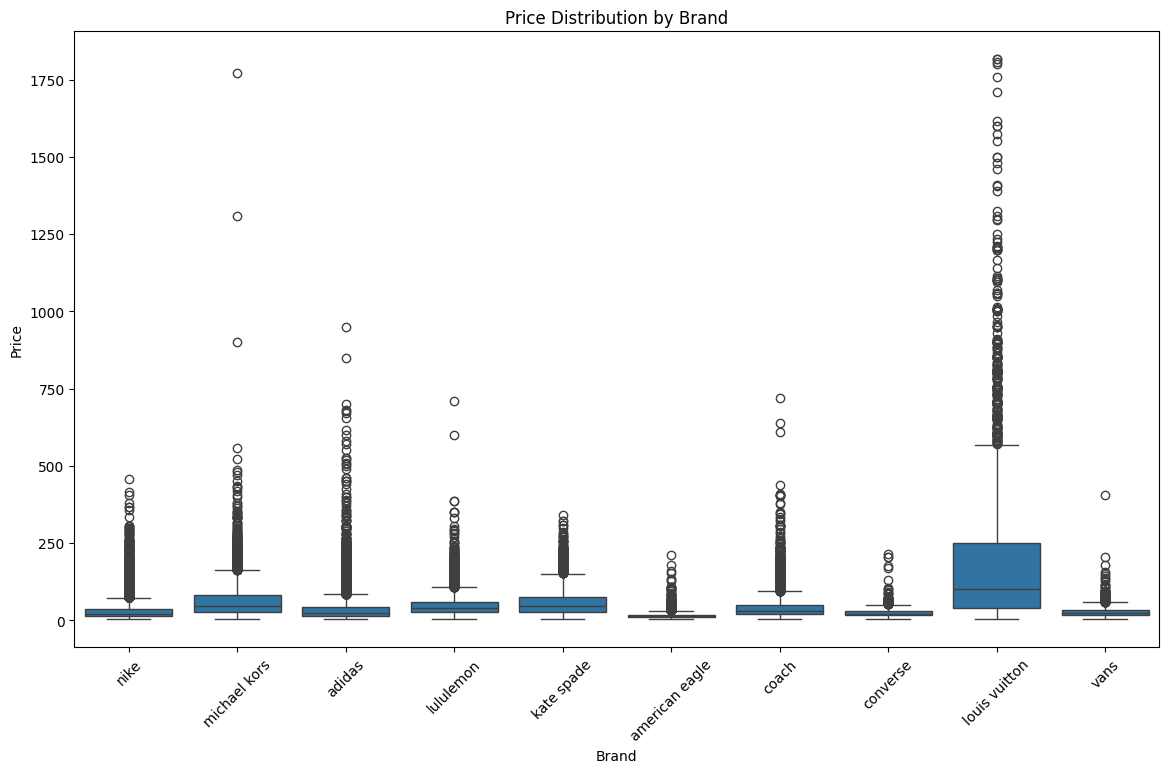

In [ ]:
# 브랜드 목록
brands = ['nike', 'lululemon', 'michael kors', 'american eagle', 'adidas',
          'coach', 'converse', 'kate spade', 'vans', 'louis vuitton']

# 데이터프레임에서 대소문자 구분 없이 해당 브랜드만 필터링
filtered_df = train_df[train_df['brand_name'].str.lower().isin(brands)]

# 가격 분포 시각화
plt.figure(figsize=(14, 8))
sns.boxplot(x='brand_name', y='price', data=filtered_df)
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)  # 브랜드 이름이 길기 때문에 라벨 회전
plt.show()

<ipython-input-36-9dc3a89e6f59>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['price_range'] = pd.cut(filtered_df['price'], bins=bins, labels=labels, right=False)


<Figure size 1600x800 with 0 Axes>

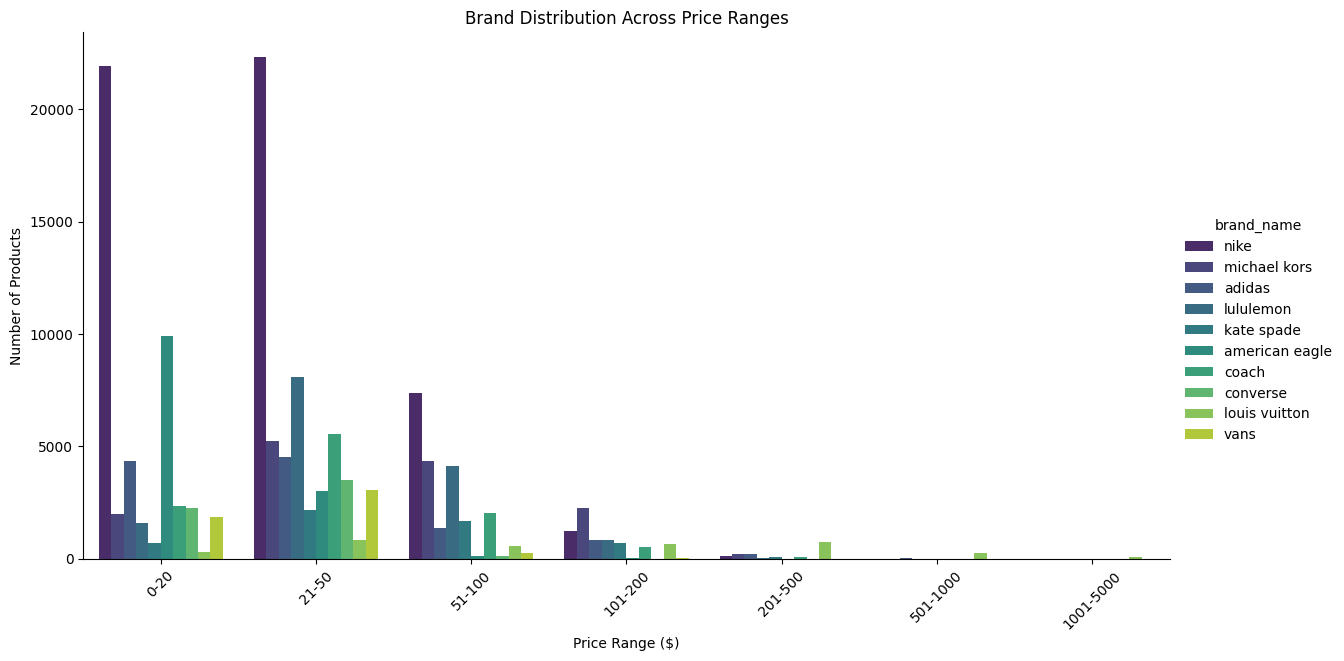

In [ ]:
# 브랜드 목록
brands = ['nike', 'lululemon', 'michael kors', 'american eagle', 'adidas',
          'coach', 'converse', 'kate spade', 'vans', 'louis vuitton']

# 대소문자 구분 없이 브랜드 필터링
train_df['brand_name'] = train_df['brand_name'].str.lower()
filtered_df = train_df[train_df['brand_name'].isin(brands)]

# 가격 구간 설정
bins = [0, 20, 50, 100, 200, 500, 1000, float('inf')]
labels = ['0-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000']

# 가격 구간으로 데이터 분류
filtered_df['price_range'] = pd.cut(filtered_df['price'], bins=bins, labels=labels, right=False)

# 가격 구간별, 브랜드별 분포 시각화
plt.figure(figsize=(16, 8))
sns.catplot(x='price_range', kind='count', hue='brand_name', data=filtered_df, height=6, aspect=2, palette='viridis')
plt.title('Brand Distribution Across Price Ranges')
plt.xlabel('Price Range ($)')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

<ipython-input-38-ee1118d042e3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['price_range'] = pd.cut(filtered_df['price'], bins=bins, labels=labels, right=False)


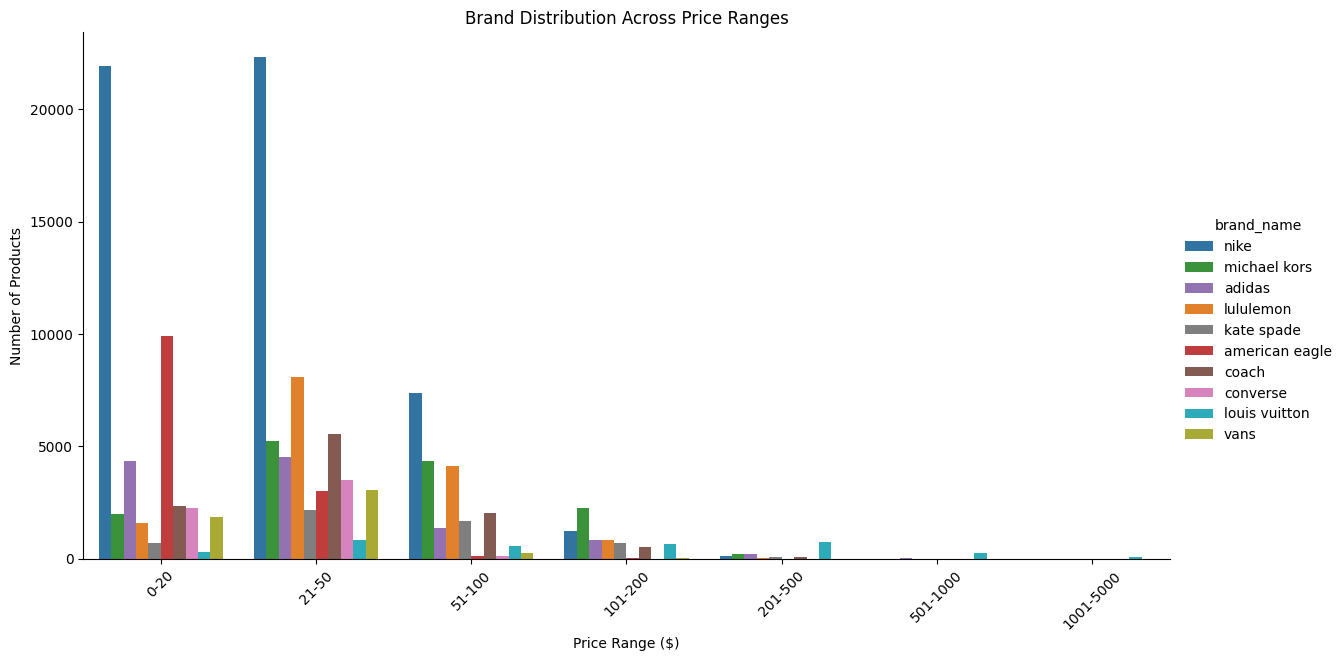

In [ ]:
# 가격 구간 설정
bins = [0, 20, 50, 100, 200, 500, 1000, float('inf')]
labels = ['0-20', '21-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000']

# 가격 구간으로 데이터 분류
filtered_df['price_range'] = pd.cut(filtered_df['price'], bins=bins, labels=labels, right=False)

# 커스텀 색상 맵 정의
palette = {
    'nike': '#1f77b4', 'lululemon': '#ff7f0e', 'michael kors': '#2ca02c',
    'american eagle': '#d62728', 'adidas': '#9467bd', 'coach': '#8c564b',
    'converse': '#e377c2', 'kate spade': '#7f7f7f', 'vans': '#bcbd22',
    'louis vuitton': '#17becf'
}

# 가격 구간별, 브랜드별 분포 시각화
sns.catplot(x='price_range', kind='count', hue='brand_name', data=filtered_df, height=6, aspect=2, palette=palette)
plt.title('Brand Distribution Across Price Ranges')
plt.xlabel('Price Range ($)')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()